## How to load probability distribution onto Quantum Circuits?

In [19]:
%pip install qiskit[finance]
%pip install pylatexenc

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np


from qiskit import Aer, QuantumCircuit
from qiskit.utils import QuantumInstance
from qiskit.algorithms import IterativeAmplitudeEstimation, EstimationProblem
from qiskit.circuit.library import LinearAmplitudeFunction
from qiskit_finance.circuit.library import LogNormalDistribution
     

## Probability Distributions

### Normal Distribution

```python
CLASS NormalDistribution(num_qubits, mu=None, sigma=None, bounds=None, upto_diag=False, name='P(x)')
```

A circuit used to encode a discretized normal distribution in qubit amplitudes.

-----

The probability density function of the normal distribution is defined as 

$$ \mathbb{P}(X = x) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x - \mu)^2}{\sigma^2}}
 $$

The circuit considers the discretized version of the normal distribution on $2^{\text{num qubits}}$ equidistant pointss $x_i$ truncated to `bounds`.

It applies the following operation

$$ \mathcal{P}_X |0\rangle^n = \sum_{i=0}^{2^n - 1} \sqrt{\mathbb{P}(x_i)} |i\rangle $$



In [21]:
# import the distribution

from qiskit_finance.circuit.library import NormalDistribution

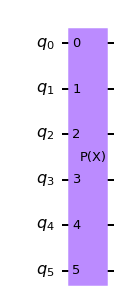

In [22]:
circuit = NormalDistribution(num_qubits=6,mu=1,sigma=1, bounds=(0,3))
circuit.draw('mpl')

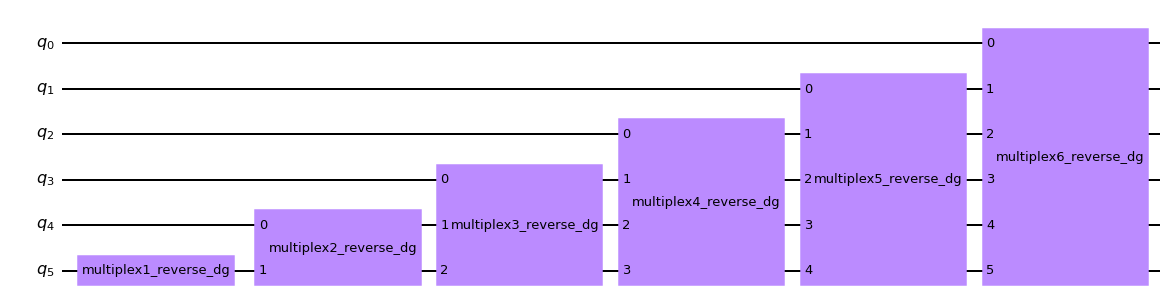

In [23]:
circuit.decompose().draw('mpl')

In [24]:
# returns the discretized points of the random variable
print(circuit.values)

[0.         0.04761905 0.0952381  0.14285714 0.19047619 0.23809524
 0.28571429 0.33333333 0.38095238 0.42857143 0.47619048 0.52380952
 0.57142857 0.61904762 0.66666667 0.71428571 0.76190476 0.80952381
 0.85714286 0.9047619  0.95238095 1.         1.04761905 1.0952381
 1.14285714 1.19047619 1.23809524 1.28571429 1.33333333 1.38095238
 1.42857143 1.47619048 1.52380952 1.57142857 1.61904762 1.66666667
 1.71428571 1.76190476 1.80952381 1.85714286 1.9047619  1.95238095
 2.         2.04761905 2.0952381  2.14285714 2.19047619 2.23809524
 2.28571429 2.33333333 2.38095238 2.42857143 2.47619048 2.52380952
 2.57142857 2.61904762 2.66666667 2.71428571 2.76190476 2.80952381
 2.85714286 2.9047619  2.95238095 3.        ]


In [25]:
## return the sampling probabilities for the values
print(circuit.probabilities)

[0.01395683 0.01462094 0.01528195 0.01593666 0.01658179 0.01721394
 0.01782973 0.01842571 0.01899849 0.0195447  0.02006107 0.02054444
 0.02099181 0.02140034 0.02176741 0.02209062 0.02236785 0.02259726
 0.02277732 0.02290681 0.02298485 0.02301093 0.02298485 0.02290681
 0.02277732 0.02259726 0.02236785 0.02209062 0.02176741 0.02140034
 0.02099181 0.02054444 0.02006107 0.0195447  0.01899849 0.01842571
 0.01782973 0.01721394 0.01658179 0.01593666 0.01528195 0.01462094
 0.01395683 0.01329272 0.01263153 0.01197604 0.01132885 0.01069236
 0.01006877 0.00946008 0.00886805 0.00829424 0.00773999 0.00720641
 0.00669443 0.00620473 0.00573783 0.00529404 0.00487351 0.00447623
 0.00410202 0.00375058 0.00342148 0.00311419]


## Visualizing the Distribution

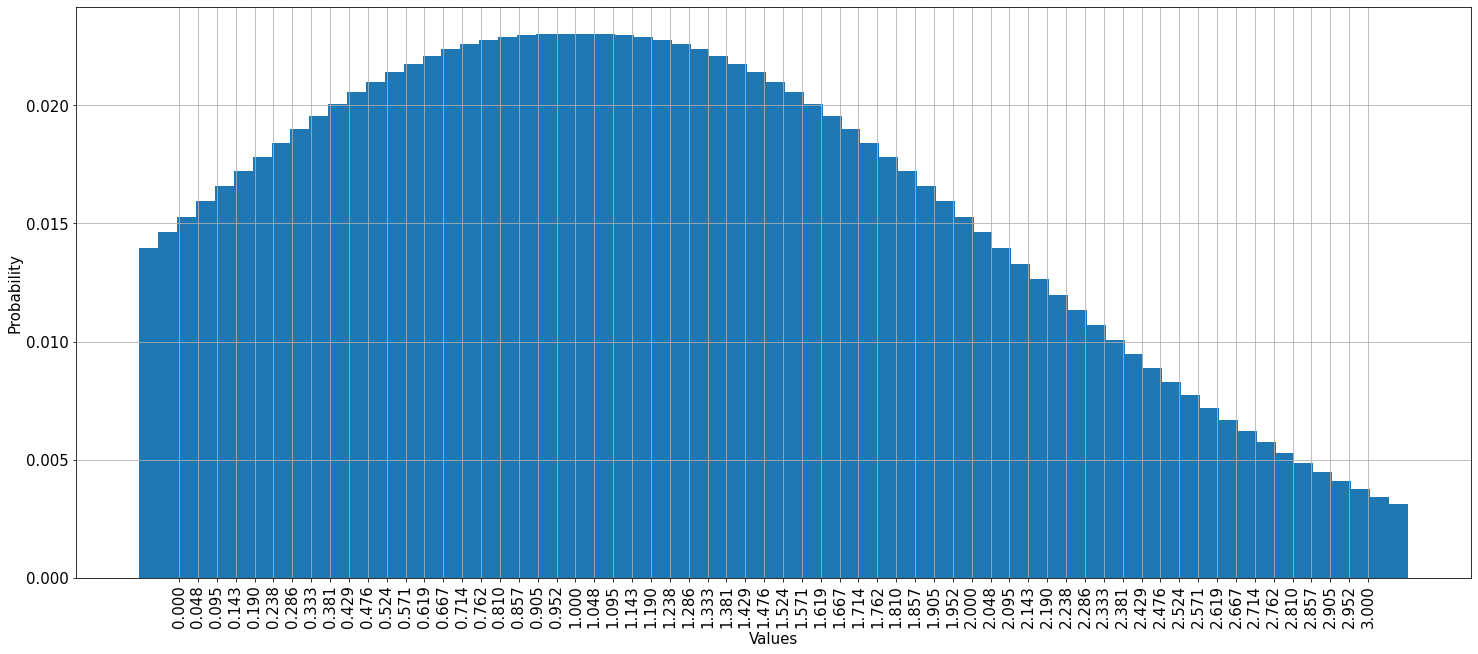

In [26]:
plt.rcParams["figure.figsize"] = (25,10.5)
x = circuit.values
y = circuit.probabilities
plt.bar(x,y, width=0.2)
plt.xticks(x,size=15, rotation=90)
plt.yticks(size=15)
plt.grid()
plt.xlabel("Values", size = 15)
plt.ylabel("Probability", size=15)
plt.show()

## Uniform Distribution

```python
CLASS UniformDistribution(num_qubits, name ='P(x)')
```

A circuit to encode a discretized uniform distribution in qubit amplitudes.

This is simply applying Hadamard to all.

-----

The probability densoty function:

$$ \mathbb{P}(X = x) = \frac{1}{N}.
$$

-----

This circuit prepares the state:

$$ \mathcal{P}_X |0\rangle^{\otimes n} = \frac{1}{\sqrt{2^n}} \sum_{x=0}^{2^n - 1} |x\rangle
$$



In [27]:
# import the distribution

from qiskit_finance.circuit.library import UniformDistribution

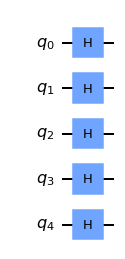

In [28]:
circuit = UniformDistribution(num_qubits=5)
circuit.decompose().draw('mpl')

In [29]:
# returns the discretized points of the random variable
circuit.data

[CircuitInstruction(operation=Instruction(name='P(X)', num_qubits=5, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(5, 'q'), 0), Qubit(QuantumRegister(5, 'q'), 1), Qubit(QuantumRegister(5, 'q'), 2), Qubit(QuantumRegister(5, 'q'), 3), Qubit(QuantumRegister(5, 'q'), 4)), clbits=())]

## Log NormalDistribution

```python
CLASSLogNormalDistribution(num_qubits, mu=None, sigma=None, bounds=None, upto_diag=False, name='P(X)')
```

The probability density function

$$\mathbb{P}(X = x) = \frac{1}{x\sqrt{2\pi\sigma^2}} e^{-\frac{(\log(x) - \mu)^2}{\sigma^2}}
$$


-----

This circuit returns the following

$$ \mathcal{P}_X |0\rangle^n = \sum_{i=0}^{2^n - 1} \sqrt{\mathbb{P}(x_i)} |i\rangle
 $$

In [30]:
from qiskit_finance.circuit.library import LogNormalDistribution
     

mu=mu, sigma = sigma**2, bounds=(low,high))
     
Plotting the probability distribution

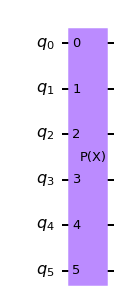

In [31]:
circuit = LogNormalDistribution(num_qubits=6,mu=3,sigma=0.029, bounds=(10,30))
circuit.draw('mpl')

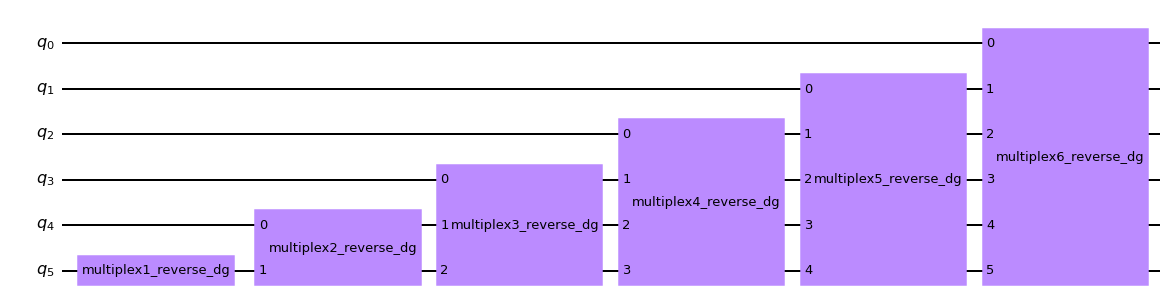

In [32]:
circuit.decompose().draw('mpl')

In [33]:
# returns the discretized points of the random variable
print(circuit.values)

[10.         10.31746032 10.63492063 10.95238095 11.26984127 11.58730159
 11.9047619  12.22222222 12.53968254 12.85714286 13.17460317 13.49206349
 13.80952381 14.12698413 14.44444444 14.76190476 15.07936508 15.3968254
 15.71428571 16.03174603 16.34920635 16.66666667 16.98412698 17.3015873
 17.61904762 17.93650794 18.25396825 18.57142857 18.88888889 19.20634921
 19.52380952 19.84126984 20.15873016 20.47619048 20.79365079 21.11111111
 21.42857143 21.74603175 22.06349206 22.38095238 22.6984127  23.01587302
 23.33333333 23.65079365 23.96825397 24.28571429 24.6031746  24.92063492
 25.23809524 25.55555556 25.87301587 26.19047619 26.50793651 26.82539683
 27.14285714 27.46031746 27.77777778 28.0952381  28.41269841 28.73015873
 29.04761905 29.36507937 29.68253968 30.        ]


In [34]:
# returns the discretized points of the random variable
print(circuit.probabilities)

[1.71047811e-05 3.45653352e-05 6.62118154e-05 1.20718345e-04
 2.10257252e-04 3.51004017e-04 5.63332554e-04 8.71561392e-04
 1.30314925e-03 1.88730319e-03 2.65304510e-03 3.62686835e-03
 4.83019114e-03 6.27686212e-03 7.97098863e-03 9.90533556e-03
 1.20604870e-02 1.44048826e-02 1.68957481e-02 1.94808491e-02
 2.21009165e-02 2.46925386e-02 2.71912798e-02 2.95347851e-02
 3.16656487e-02 3.35338640e-02 3.50987228e-02 3.63300904e-02
 3.72090345e-02 3.77278386e-02 3.78894677e-02 3.77065827e-02
 3.72002152e-02 3.63982196e-02 3.53336160e-02 3.40429235e-02
 3.25645704e-02 3.09374454e-02 2.91996367e-02 2.73873884e-02
 2.55342813e-02 2.36706402e-02 2.18231495e-02 2.00146590e-02
 1.82641511e-02 1.65868420e-02 1.49943878e-02 1.34951662e-02
 1.20946098e-02 1.07955683e-02 9.59868044e-03 8.50274076e-03
 7.50504959e-03 6.60173782e-03 5.78806087e-03 5.05865867e-03
 4.40778057e-03 3.82947547e-03 3.31774895e-03 2.86668957e-03
 2.47056735e-03 2.12390774e-03 1.82154418e-03 1.55865259e-03]


### Visualizing the Distribution

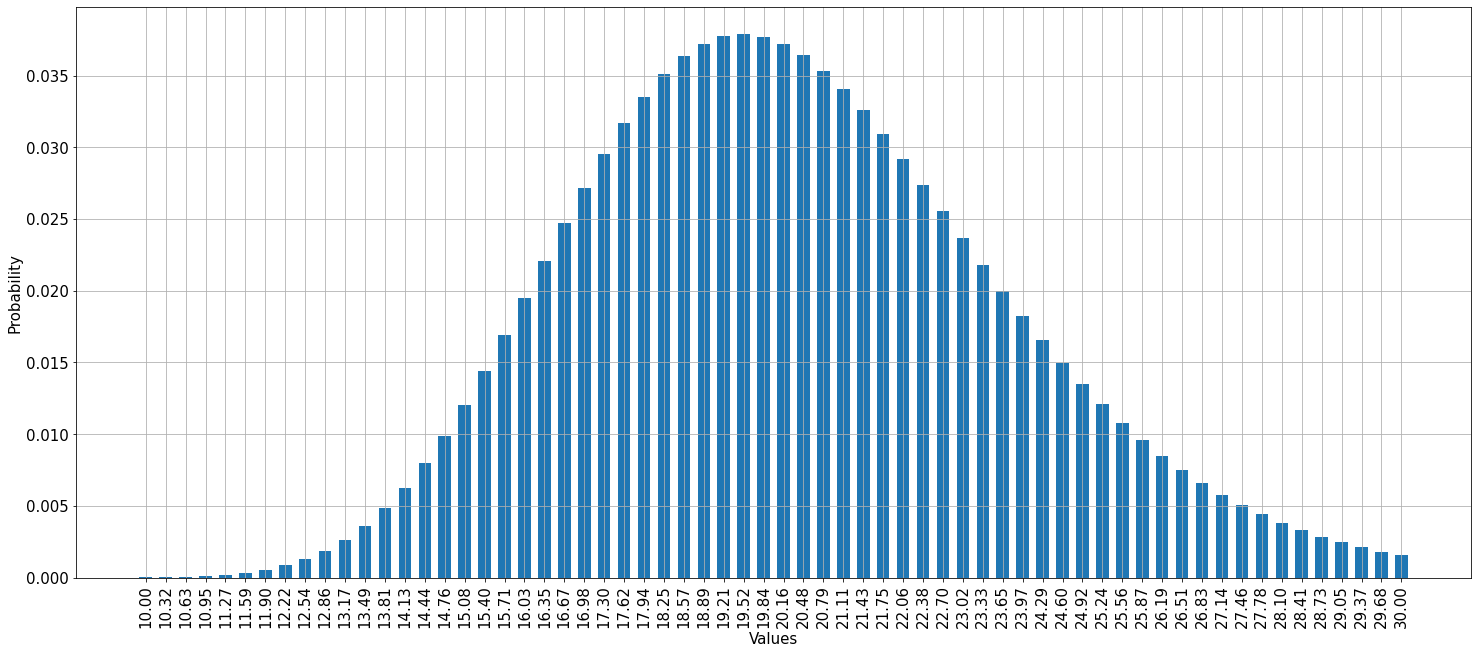

In [35]:
plt.rcParams["figure.figsize"] = (25,10.5)
x = circuit.values
y = circuit.probabilities
plt.bar(x,y, width=0.2)
plt.xticks(x,size=15, rotation=90)
plt.yticks(size=15)
plt.grid()
plt.xlabel("Values", size = 15)
plt.ylabel("Probability", size=15)
plt.show()

## qGANs for loading random distributions

Given $k$ dimensional data samples, we employ a **quantum Generative Adversarial Network** to learn the data's underlying random distribution and load it directly into a quantum state:

$$\big| g_{\theta}\rangle = \sum_{j=0}^{2^n-1} \sqrt{p_{\theta}^{j}}\big| j \rangle$$

where $p_{\theta}^{j}$ describe the occurence probability of the basis states $|j⟩$

-----

The aim of the qGAN training is to generate a state $|g_{\theta}⟩$ where $p_{\theta}^j$ for $j \in \{ 0,...,2^{n}-1\}$, describe the probability distribution that is close to the distribution underlying the training data $X = \{x^0, x^1,....x^{k-1}\}$

-----

Check the paper [here](https://arxiv.org/abs/1904.00043)


## Option Pricing with qGANs

We discuss how a Quantum Machine Learning algorithm, namely a Generative Adversarial Network can facilitate the pricing of a European Call option.


------


A qGAN can be trained such that a quantum circuit models the spot price of an asset underlying a European call otpion. The resulting model can then be integrated into a **Quantum Amplitude Estimation** based algorithm.


See the paper [here](https://www.nature.com/articles/s41534-019-0223-2)

In [42]:
import matplotlib.pyplot as plt
import numpy as np

#quantum imports

from qiskit import Aer, QuantumRegister,QuantumCircuit
from qiskit.circuit import ParameterVector
from qiskit.circuit.library import TwoLocal
from qiskit.quantum_info import Statevector

from qiskit.utils import QuantumInstance
from qiskit.algorithms import IterativeAmplitudeEstimation, EstimationProblem
from qiskit_finance.applications.estimation import EuropeanCallPricing
from qiskit_finance.circuit.library import NormalDistribution


### Uncertainty Model

The model assumes that the spot price at maturity $S_T$ for a call option is **log-normally** distributed. Thus we can train a qGAN on samples from a log-normal distribution and use the result as an uncertainty model underlying the option.

In [43]:
# set up the upper and lower data values

bounds = np.array([0.0,7.0])

# number of qubits required

num_qubits = 3

# load the trained circuit parameters
# Load the trained circuit parameters
g_params = [0.29399714, 0.38853322, 0.9557694, 0.07245791, 6.02626428, 0.13537225]


# set an initial state
init_dist = NormalDistribution(num_qubits, mu= 1.0, sigma=1.0, bounds=bounds)

# construct the variational form
var_form = TwoLocal(num_qubits,"ry","cz", entanglement='circular',reps=1)

# keep a list of the parameters so we can associate them to the list of numerical values
# (otherwise we need a dictionary)
theta = var_form.ordered_parameters

# compose the generator circuit, this is the circuit loading the uncertainty model
g_circuit = init_dist.compose(var_form)


## Evaluate Expected Payoff

Now, the trained uncertainty model can be used to evaluate the expectation valie of the option's payoff function with QAE

In [44]:
# set the strike price (should be within the low and the high value of the uncertainty)
strike_price = 2

# set the approximation scaling for the payoff function
c_approx = 0.25

## Plot the probability distribution
Next, we plot the trained probability distribution and, for reasons of comparison, also the target probability distribution.



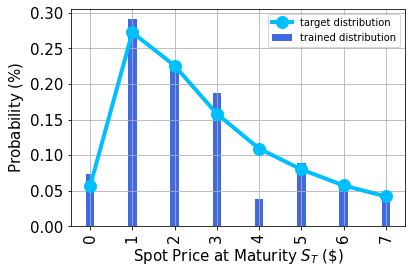

In [45]:
# Evaluate trained probability distribution
values = [
    bounds[0] + (bounds[1] - bounds[0]) * x / (2**num_qubits - 1) for x in range(2**num_qubits)
]
uncertainty_model = g_circuit.assign_parameters(dict(zip(theta, g_params)))
amplitudes = Statevector.from_instruction(uncertainty_model).data

x = np.array(values)
y = np.abs(amplitudes) ** 2

# Sample from target probability distribution
N = 100000
log_normal = np.random.lognormal(mean=1, sigma=1, size=N)
log_normal = np.round(log_normal)
log_normal = log_normal[log_normal <= 7]
log_normal_samples = []
for i in range(8):
    log_normal_samples += [np.sum(log_normal == i)]
log_normal_samples = np.array(log_normal_samples / sum(log_normal_samples))

# Plot distributions
plt.bar(x, y, width=0.2, label="trained distribution", color="royalblue")
plt.xticks(x, size=15, rotation=90)
plt.yticks(size=15)
plt.grid()
plt.xlabel("Spot Price at Maturity $S_T$ (\$)", size=15)
plt.ylabel("Probability ($\%$)", size=15)
plt.plot(
    log_normal_samples,
    "-o",
    color="deepskyblue",
    label="target distribution",
    linewidth=4,
    markersize=12,
)
plt.legend(loc="best")
plt.show()

## Evaluate Expected Payoff
Now, the trained uncertainty model can be used to evaluate the expectation value of the option's payoff function analytically and with Quantum Amplitude Estimation.

Analytically calculated expected payoff w.r.t. the target distribution:  1.0535
Analytically calculated expected payoff w.r.t. the trained distribution: 0.9805


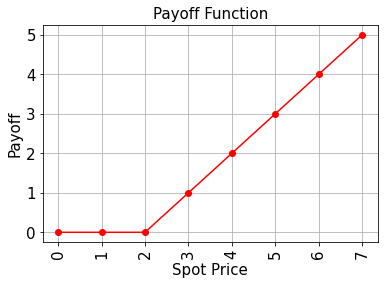

In [46]:
# Evaluate payoff for different distributions
payoff = np.array([0, 0, 0, 1, 2, 3, 4, 5])
ep = np.dot(log_normal_samples, payoff)
print("Analytically calculated expected payoff w.r.t. the target distribution:  %.4f" % ep)
ep_trained = np.dot(y, payoff)
print("Analytically calculated expected payoff w.r.t. the trained distribution: %.4f" % ep_trained)

# Plot exact payoff function (evaluated on the grid of the trained uncertainty model)
x = np.array(values)
y_strike = np.maximum(0, x - strike_price)
plt.plot(x, y_strike, "ro-")
plt.grid()
plt.title("Payoff Function", size=15)
plt.xlabel("Spot Price", size=15)
plt.ylabel("Payoff", size=15)
plt.xticks(x, size=15, rotation=90)
plt.yticks(size=15)
plt.show()

In [47]:
# construct circuit for payoff function
european_call_pricing = EuropeanCallPricing(
    num_qubits,
    strike_price=strike_price,
    rescaling_factor=c_approx,
    bounds=bounds,
    uncertainty_model=uncertainty_model,
)

In [48]:
# set target precision and confidence level
epsilon = 0.01
alpha = 0.05

qi = QuantumInstance(Aer.get_backend("aer_simulator"), shots=100)
problem = european_call_pricing.to_estimation_problem()
# construct amplitude estimation
ae = IterativeAmplitudeEstimation(epsilon, alpha=alpha, quantum_instance=qi)

In [49]:
result = ae.estimate(problem)

In [50]:
conf_int = np.array(result.confidence_interval_processed)
print("Exact value:        \t%.4f" % ep_trained)
print("Estimated value:    \t%.4f" % (result.estimation_processed))
print("Confidence interval:\t[%.4f, %.4f]" % tuple(conf_int))

Exact value:        	0.9805
Estimated value:    	1.0001
Confidence interval:	[0.9689, 1.0314]
